# Setting up the Environment

In [56]:
# The basic libraries
import time
from IPython.display import clear_output
import numpy as np 
import pandas as pd 
from numpy.random import seed
seed(11111)

# For plotting 
import seaborn as sns
import matplotlib.pyplot as plt

# Encoders and Scaling 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


#SKLEARN

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
# MODELS

# MULT
from sklearn.linear_model   import LogisticRegression
from sklearn.linear_model   import RidgeClassifier
from sklearn.svm            import SVC
from sklearn.svm            import NuSVC
from sklearn.svm            import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes    import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble       import StackingClassifier

#TREE
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier, plot_tree
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

#REGRESSORS
from sklearn.linear_model  import ElasticNet, Ridge, Lasso, BayesianRidge, ARDRegression, TweedieRegressor
from sklearn.svm           import LinearSVR, NuSVR, SVR
from sklearn.ensemble      import BaggingRegressor
from sklearn.kernel_ridge  import KernelRidge

# Loading the Data


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Putting on index to each dataset before splitting it
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

# dataframe 
df = pd.concat([train, test], axis=0, sort=False)

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


# EDA

In [4]:
# CHecking the dtypes in the df 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [5]:
# Checking the number of missing values
df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [6]:
# Percentage missing values
((df.isna().sum())/len(df)) * 100

Survived    31.932773
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64

### Correlation Matrix to get a sense of the features

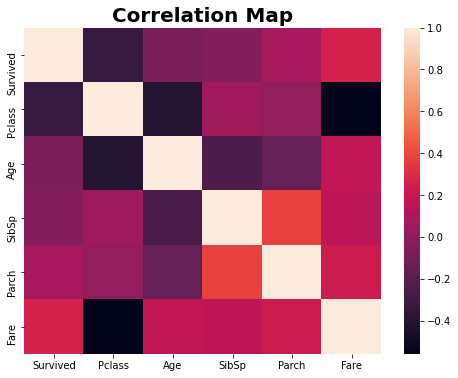

In [7]:
corr_df = df.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

### Initial thoughts:
#### Cabin missing values percentage greater than 70% therefore the column seems to be of no use however it would be prudent to explore the data before dropping the column entirely.
#### Age values will have to be imputed, further analysis needs to be done. So is the case with Embarked

# Extracting the TITLES


In [8]:
get_Title_from_Name = lambda name: name.split(',')[1].split('.')[0].strip()

In [9]:
df['Title'] = df['Name'].map(get_Title_from_Name)

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [11]:
df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
the Countess      1
Capt              1
Mme               1
Jonkheer          1
Lady              1
Dona              1
Sir               1
Don               1
Name: Title, dtype: int64

#### Way too many titles and the occurencies are small. I would group them up, they all seem to be in and around the Royal circle and some form Service Officers, so I will create a Dict to replace the titles.

In [12]:
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona":"Royalty"
}

In [13]:
df["Title"] = df.Title.map(title_dictionary)

In [14]:
df.Title.value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

### Correlation Matrix just to get an idea of w

# Exploring the AGE 

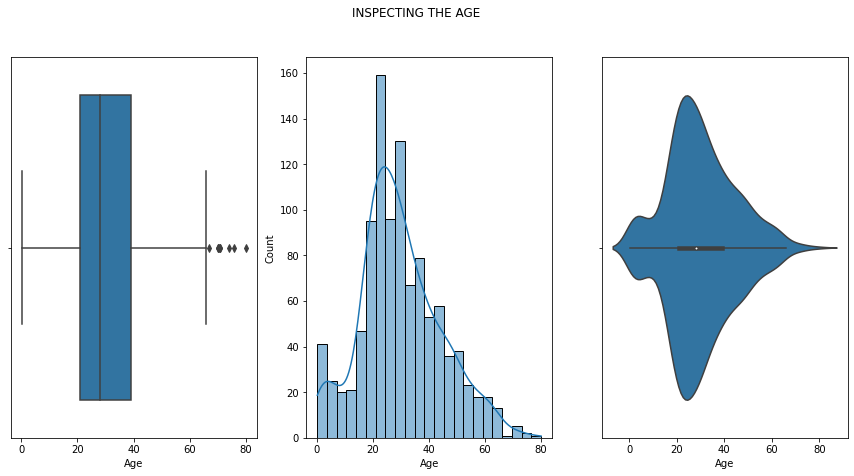

In [15]:
def Exlporer(df):

    fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15,7))
    fig.suptitle('INSPECTING THE AGE')
    sns.boxplot(ax=axes[0],x=df.Age)
    sns.histplot(ax=axes[1],x=df.Age,kde=True)
    sns.violinplot(ax=axes[2],x=df.Age,split=True)
Exlporer(df=df)

In [16]:
def Stats(x):
    mean_x = x.mean()
    median_x =x.median()
    mode_x = x.mode()
    percent_missing =((x.isnull().sum() )/ len(x))*100
    print( f'Mean Age: {round(mean_x,2)}\n'
    f'Median Age: {round(median_x,2)}\n'
    f'Missing Data : {round(percent_missing,2)}% \n'
    
    )
Stats(df.Age)

Mean Age: 29.88
Median Age: 28.0
Missing Data : 20.09% 



#### Ideal practice would be to use Median as this accounts for the outliers and omits them unlike the mean of the data
#### Potential ways to work with it : 1.Take the median of each sex in each class
#### 2. Take the median of the Age based on the titles of the person i.e. Mr. , Master , Miss , Mrs....

In [17]:
# Exploring idea 1
df.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex     Survived
1       female  0.0         25.0
                1.0         35.0
        male    0.0         45.5
                1.0         36.0
2       female  0.0         32.5
                1.0         28.0
        male    0.0         30.5
                1.0          3.0
3       female  0.0         22.0
                1.0         19.0
        male    0.0         25.0
                1.0         25.0
Name: Age, dtype: float64

In [18]:
# Idea 2 still work in progress however can check the median age by title
df.groupby(['Title'])['Age'].median()


Title
Master      4.0
Miss       22.0
Mr         29.0
Mrs        35.0
Officer    49.5
Royalty    39.5
Name: Age, dtype: float64

In [19]:
# Imputing
df["Age"].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("median"), inplace=True)

In [20]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Title          0
dtype: int64

# Exploring what can be done with CABIN

In [21]:
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
F2                 4
                  ..
D46                1
C82                1
E39 E41            1
B30                1
B39                1
Name: Cabin, Length: 186, dtype: int64

#### The prefix is a Letter for each cabin. Further research about the titanic I understood that there were different Decks which had Alphabetical names in ascending order. I decided to create a new column for the Decks and try to implement that in the model.

In [22]:
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [23]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,M
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,M
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,M


In [24]:
df.Deck.value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

#### At the moment this seems to be a deadend and may be better off to drop the column entirely unless we can use it to feature engineer another column, but still would require imputation/interpolation. Which will be skewing the data and affect the models.

# Exploring the SibSp and Parch

#### SibSp and Parch are both talking about Family/ Relations... I think it would be more optimal to create one column and that could further help to explore and engineer more features.


In [25]:
df['PartySize'] = df['SibSp'] + df['Parch'] + 1

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,PartySize
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,M,2
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,M,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,M,1


# Exploring the Fare 

#### Decided to create Fare per person as some fare prices were inclusive of people travelling on the same ticket or the same party

In [27]:
df['FarePP'] = df['Fare'] / df['PartySize'] 

In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,PartySize,FarePP
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,M,2,3.62500
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2,35.64165
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,M,1,7.92500
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2,26.55000
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,M,1,8.05000


# Exploring the Tickets

In [29]:
df.Ticket.value_counts()

CA. 2343    11
CA 2144      8
1601         8
3101295      7
347077       7
            ..
347071       1
680          1
349235       1
C 7076       1
695          1
Name: Ticket, Length: 929, dtype: int64

In [30]:
df['Ticket'] = df.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])

In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,PartySize,FarePP
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,NaN,S,Mr,M,2,3.62500
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C,Mrs,C,2,35.64165
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,NaN,S,Miss,M,1,7.92500
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2,26.55000
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,M,1,8.05000


# 'Encoding'

In [32]:
# Gender
change = {'female':0,'male':1}
df.Sex = df.Sex.map(change)  ## could use OrdinalEncoding if your pipeline or model is tree based, else OHE for Multiplicative Models 

In [33]:
# Embarked
change = {'S':0,'C':1,'Q':2}
df.Embarked = df.Embarked.map(change)
df.Embarked.fillna(df.Embarked.median(), inplace = True)

In [34]:
# Age
cat_age = pd.cut(df['Age'], 6)
cat_age

PassengerId
1       (13.475, 26.78]
2       (26.78, 40.085]
3       (13.475, 26.78]
4       (26.78, 40.085]
5       (26.78, 40.085]
             ...       
1305    (13.475, 26.78]
1306    (26.78, 40.085]
1307    (26.78, 40.085]
1308    (13.475, 26.78]
1309    (13.475, 26.78]
Name: Age, Length: 1309, dtype: category
Categories (6, interval[float64]): [(0.0902, 13.475] < (13.475, 26.78] < (26.78, 40.085] < (40.085, 53.39] < (53.39, 66.695] < (66.695, 80.0]]

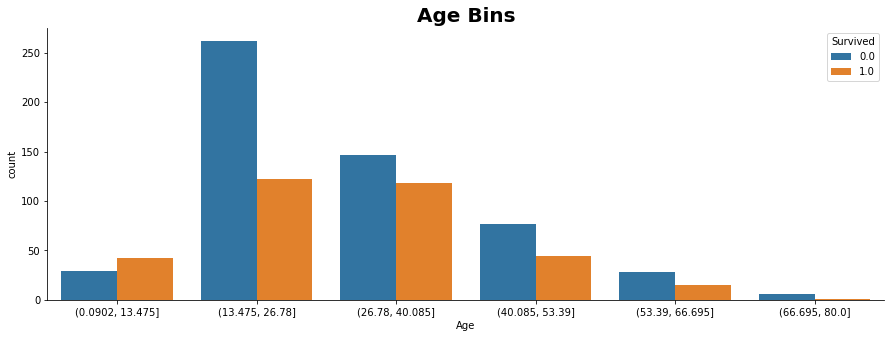

In [35]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=cat_age, hue='Survived', data=df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [36]:
df['Age'] = LabelEncoder().fit_transform(cat_age) 

In [37]:
pd.crosstab(df['Age'], df['Survived'])

Survived,0.0,1.0
Age,,
0,29,42
1,262,122
2,147,118
3,77,44
4,28,15
5,6,1


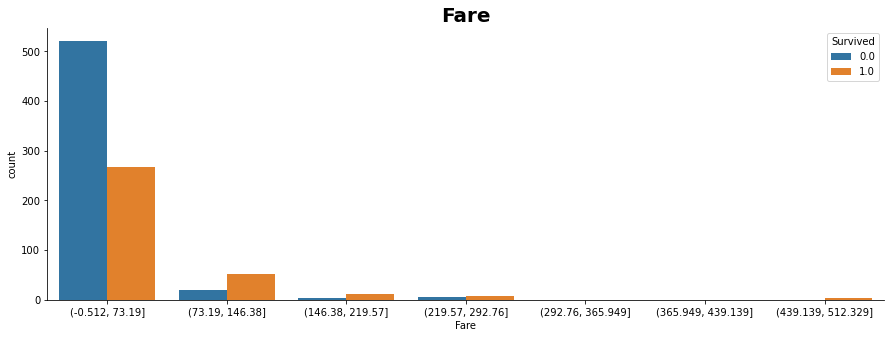

In [38]:
# Fare
df["Fare"].fillna(df.groupby(['Pclass', 'Sex'])['Fare'].transform("median"), inplace=True)
cat_fare = pd.cut(df['Fare'],7) #Using the Number of Cabins as a ref for the bins
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=cat_fare, hue='Survived', data=df).set_title("Fare",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [39]:
df['Fare'] = LabelEncoder().fit_transform(cat_fare) 

In [40]:
pd.crosstab(df['Fare'], df['Survived'])

Survived,0.0,1.0
Fare,,
0,521,268
1,19,52
2,4,11
3,5,8
4,0,3


In [41]:
# Title
pd.crosstab(df['Title'], df['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,129
Mr,436,81
Mrs,26,101
Officer,13,5
Royalty,2,3


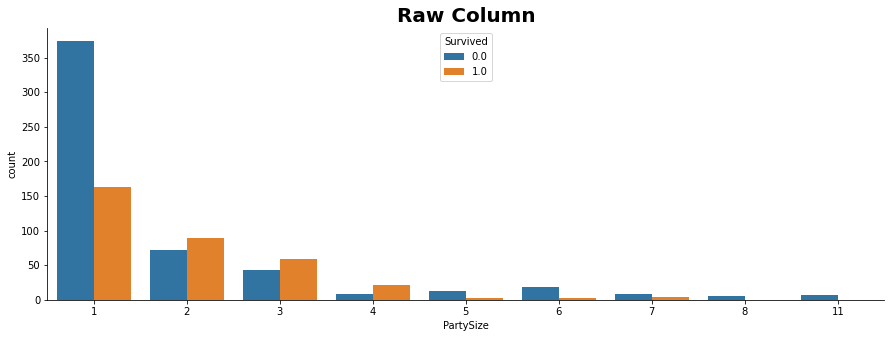

In [42]:
# PartySize
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='PartySize', hue='Survived', data=df).set_title("Raw Column",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [43]:
# Binning PartySize column
df.loc[ df['PartySize'] == 1, 'PartySize'] = 0                            # Alone
df.loc[(df['PartySize'] > 1) & (df['PartySize'] <= 4), 'PartySize'] = 1  # Small Party
df.loc[(df['PartySize'] > 4) & (df['PartySize'] <= 6), 'PartySize'] = 2  # Medium Party
df.loc[df['PartySize']  > 6, 'PartySize'] = 3  # Massive

In [44]:
df.isna().sum()

Survived      418
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin        1014
Embarked        0
Title           0
Deck            0
PartySize       0
FarePP          1
dtype: int64

## Dropping Some Columns

In [45]:
df.drop(['Name','Embarked','Cabin','SibSp','Parch','Deck','Title','FarePP'], axis = 1, inplace = True) # for Title could use labelenconding again 

In [46]:
df.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'PartySize'], dtype='object')

### Correlation Matrix 

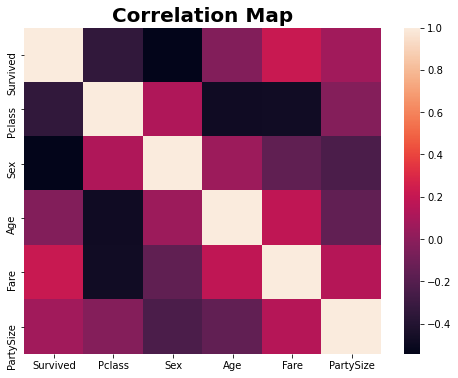

In [47]:
new_corr_df = df.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(new_corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [48]:
train, test = df.loc[train.index], df.loc[test.index]

X_train = train.drop(['Survived'], axis = 1)
Y_train = train["Survived"]
train_names = X_train.columns

X_test = test.drop(['Survived'], axis = 1)


In [49]:
X_test.shape

(418, 6)

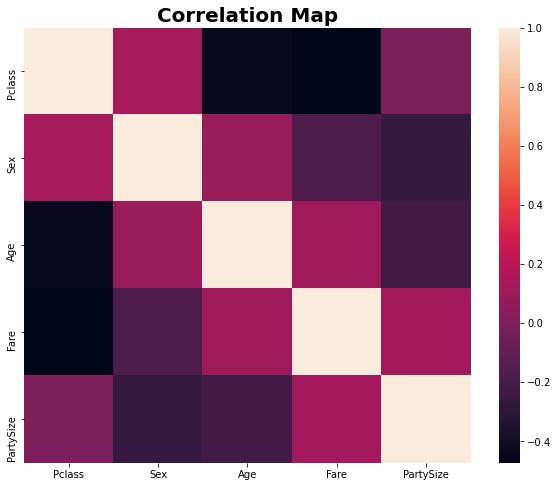

In [50]:
corr_train = X_train.corr()
fig, axs = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_train).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
plt.show()

In [51]:
# Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predDT = decision_tree.predict(X_test)

print("Accuracy of the model: ",round(decision_tree.score(X_train, Y_train) * 100, 2))

Accuracy of the model:  99.55


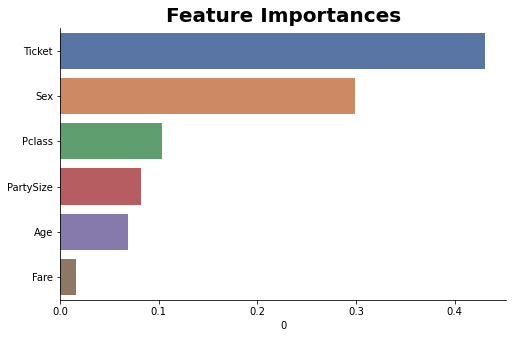

In [53]:
importances = pd.DataFrame(decision_tree.feature_importances_, index = train_names)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:6,:] 

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()

# A more comprehensive method


In [54]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "Skl HistGBM":   HistGradientBoostingClassifier(max_iter=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "CatBoost":      CatBoostClassifier(n_estimators=100),
} 



   
tree_classifiers = {name: pipeline.make_pipeline( model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]


Pipeline(steps=[('lgbmclassifier', LGBMClassifier())])

In [57]:
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_classifiers.items():    
        
    start_time = time.time()
    pred = model_selection.cross_val_predict(model, X_train, Y_train, cv=skf)  
    total_time = time.time() - start_time
    
    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(Y_train, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(Y_train, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)

    results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
    results_ord.index += 1 
    
    clear_output(wait=True)
    display(results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d'))


,Model,Accuracy,Bal Acc.,Time
1,Skl GBM,84.175084,82.142172,0.743317
2,XGBoost,83.950617,82.070271,1.712473
3,LightGBM,83.838384,82.365066,1.096944
4,CatBoost,83.501684,81.375228,2.119615
5,Skl HistGBM,82.603816,80.977375,9.568465
6,AdaBoost,82.267116,80.759275,1.380786
7,Random Forest,80.134680,78.753236,1.481643
8,Decision Tree,79.797980,78.480012,0.038896
9,Extra Trees,78.787879,77.605215,1.143206


In [58]:
best_model = tree_classifiers["Skl GBM"] 
best_model.fit(X_train,Y_train)

Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())])

In [59]:
test_pred = best_model.predict(X_test)